In [81]:
import pandas as pd
import datetime
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [82]:
#Carga el archivo
df = pd.read_excel('coronel_07_08_23.xlsx', header=1, sheet_name='coronel_07_08_23')
#Muestra el archivo para que identifiques el nombre de las columnas
df

,N.º,Fecha,Tiempo,pp Event (tic)
0,1,2023-04-12 19:00:00,2023-04-12 19:00:00,0
1,2,2023-04-26 12:11:31,2023-04-26 12:11:31,1
2,3,2023-04-30 15:04:24,2023-04-30 15:04:24,2
3,4,2023-05-18 16:43:16,2023-05-18 16:43:16,3
4,5,2023-05-20 19:11:22,2023-05-20 19:11:22,4
...,...,...,...,...
2459,2460,2023-07-31 22:25:07,2023-07-31 22:25:07,2459
2460,2461,2023-07-31 22:36:00,2023-07-31 22:36:00,2460
2461,2462,2023-07-31 22:49:00,2023-07-31 22:49:00,2461
2462,2463,2023-08-01 01:04:26,2023-08-01 01:04:26,2462


In [83]:
#Agrega la columna de precipitacion de 0.2 mm por tic
df[ 'precipitacion'] = None 

#Elimina la columna tiempo, que esta demas
del df['Tiempo']
del df['N.º']
#Variable que se acosia al nombre de columna que quieres cambiar, por ejemplo la columna evento
cambio = 'pp Event (tic)' 
#cambia la columna por el nombre evento
df = df.rename(columns={cambio: 'Evento'})
df

,Fecha,Evento,precipitacion
0,2023-04-12 19:00:00,0,None
1,2023-04-26 12:11:31,1,None
2,2023-04-30 15:04:24,2,None
3,2023-05-18 16:43:16,3,None
4,2023-05-20 19:11:22,4,None
...,...,...,...
2459,2023-07-31 22:25:07,2459,None
2460,2023-07-31 22:36:00,2460,None
2461,2023-07-31 22:49:00,2461,None
2462,2023-08-01 01:04:26,2462,None


In [84]:
#ESTA CELDA DE CODIGO SOLO SE UTILIZA PARA DETERMINAR LA PRECIPITACION
#detecta numero entero del vector dentro de un ciclo for y le asocia valores
#def isInt(num):
#    return np.equal(np.mod(num, 1), 0)
#arr = df.Evento
#for num in arr:
 #   elif isInt(num):
  #      df.precipitacion = 0.2
def isInt(num):
    return np.equal(np.mod(num, 1), 0)

# Utiliza iterrows para recorrer las filas del DataFrame
for index, row in df.iterrows():
    evento = row['Evento']
    
    if evento == 0:
        df.at[index, 'precipitacion'] = 0
    
    elif isInt(evento):
        df.at[index, 'precipitacion'] = 0.2

del df['Evento']
df
#df.to_excel('Precipitacion diaria desde agosto.xlsx')

,Fecha,precipitacion
0,2023-04-12 19:00:00,0
1,2023-04-26 12:11:31,0.2
2,2023-04-30 15:04:24,0.2
3,2023-05-18 16:43:16,0.2
4,2023-05-20 19:11:22,0.2
...,...,...
2459,2023-07-31 22:25:07,0.2
2460,2023-07-31 22:36:00,0.2
2461,2023-07-31 22:49:00,0.2
2462,2023-08-01 01:04:26,0.2


In [85]:
# Leer la hoja específica de cada archivo Excel en DataFrames
df2 = pd.read_excel('Datos Red Pluviometros.xlsx', sheet_name='Coronel')

df2

,Fecha,precipitacion
0,08/02/22 20:00,0.0
1,08/02/22 20:01,0.0
2,08/02/22 20:02,0.0
3,08/02/22 20:03,0.0
4,08/02/22 20:04,0.0
...,...,...
85269,04/12/23 16:54,0.0
85270,04/12/23 16:54,0.0
85271,04/12/23 16:54,0.0
85272,04/12/23 16:54,0.0


In [86]:
if 'precipitacion' in df.columns and 'precipitacion' in df2.columns:
    # Las columnas existen en ambos DataFrames, procede con la combinación
    df3 = pd.concat([df2, df], ignore_index=True)
else:
    # Las columnas no existen en uno o ambos DataFrames
    print("La columna 'Precipitación (mm)' no se encuentra en uno o ambos DataFrames.")
df3

,Fecha,precipitacion
0,08/02/22 20:00,0.0
1,08/02/22 20:01,0.0
2,08/02/22 20:02,0.0
3,08/02/22 20:03,0.0
4,08/02/22 20:04,0.0
...,...,...
87733,2023-07-31 22:25:07,0.2
87734,2023-07-31 22:36:00,0.2
87735,2023-07-31 22:49:00,0.2
87736,2023-08-01 01:04:26,0.2


#ESTA CELDA ES GENERICA, PUEDES ESTIMAR LO QUE QUIERAS EN LOS MINUTOS QUE QUIERAS
#COMO MAXIMOS, MINIMOS, SUMA, PROMEDIOS.
#genera el dataframe sobre la base de las fechas
df['fe']=pd.to_datetime(df['Fecha'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df['fecha_hora_min']=pd.to_datetime(df.fe.dt.strftime('%m/%d/%y %H:%M'))

#agrupa los datos por minuto
df_g=df.groupby(by='fecha_hora_min').sum()
df_g.shape
#genera filas para cada minuto del rango de datos
#r = pd.date_range(start=df_g.index.min(),end=df_g.index.max(),freq='min')

#asigna una pp nula a las fechas (minutos) ingresados y reordena incluyendo las fechas con datos
#df_g=df_g.reindex(r).fillna(0.0) ##siempre revisar ya que agrega ceros donde no hay registros.
#por ejemplo, este set de datos viene cada 10 minutos, si hubiera querido los datos cada 1 minutos, debo activar
#esa linea de codigo para que rellene con ceros los minutos que no tienen registro

df_10min1 = df_g.resample('10T',closed='right', label='right').min() #label='right', closed='right' #mean()*10
df_10min2 = df_g.resample('30T',closed='right', label='right').min()
df_10min3 = df_g.resample('60T',closed='right', label='right').min()
df_10min4 = df_g.resample('360T',closed='right', label='right').min()

#entrega el nuevo tamaño del archivo (filas, columnas)
#df_g.shape
df_10min1.to_excel('Temperatura_10_minutos_min_2.xlsx')
df_10min2.to_excel('Temperatura_30_minutos_min_2.xlsx')
df_10min3.to_excel('Temperatura_60_minutos_min_2.xlsx')
df_10min4.to_excel('Temperatura_360_minutos_min_2.xlsx')


In [87]:
#genera el dataframe sobre la base de las fechas
df3['fe']=pd.to_datetime(df3['Fecha'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
df3['fecha_hora_min']=pd.to_datetime(df3.fe.dt.strftime('%m/%d/%y %H:%M'))

#agrupa los datos por minuto
df_g=df3.groupby(by='fecha_hora_min').sum()
r = pd.date_range(start=df_g.index.min(),end=df_g.index.max(),freq='min')
df_g=df_g.reindex(r).fillna(0.0)
df_g

,precipitacion
2022-08-02 20:00:00,0.0
2022-08-02 20:01:00,0.0
2022-08-02 20:02:00,0.0
2022-08-02 20:03:00,0.0
2022-08-02 20:04:00,0.0
...,...
2023-08-07 11:23:00,0.0
2023-08-07 11:24:00,0.0
2023-08-07 11:25:00,0.0
2023-08-07 11:26:00,0.0


In [88]:
#AQUI PUEDES OBTENER EL PROMEDIO DIARIO, ACUMULADA DIARIA, MINIMO DIARIO Y MAXIMO DIARIO
#DEBES CAMBIAR DENTRO DEL FOR EL NP.SUM, NP.MEAN, NP.MAX Y ASI

#Se considera como un vector los indices de la precipitacion, los cuales son las fechas
precipitacion = df_g
dt_fechas = df_g.index
dias = np.array([dt_fecha.day for dt_fecha in dt_fechas])

#Crea un vector de zeros del largo de los dias que hay en dt_fechas, es donde
#se guardaran las sumas de la precipitacion por dia
precip_dia = np.zeros(len(dias))

#Busca el indice donde el vector dia cambia de dia
cambios_de_dia = np.where(np.roll(dias, 1) != dias)[0]
fech = []
precipi = []
n = len(precipitacion)
# Sumar la precipitación correspondiente a cada día
for i in range(len(cambios_de_dia)):
    if i == len(cambios_de_dia) - 1: # si es igual al ultimo dia
        precip_dia[cambios_de_dia[i]:] = np.sum(precipitacion[cambios_de_dia[i]:])
    else: # si es distinto al ultimo dia
        #Aqui se realiza la suma de la precipitacion desde el cambio de dia i hasta el i+1 sin tomar en cuanta el i+1
        precip_dia[cambios_de_dia[i]:cambios_de_dia[i+1]] = np.sum(precipitacion[cambios_de_dia[i]:cambios_de_dia[i+1]])
    
    
    # Agregar fecha y precipitación a las listas correspondientes, GUARDA LOS VECTORES PARA TRABAJARLOS LUEGO
    fechitas = dt_fechas[cambios_de_dia[i]].date().strftime('%m-%d-%Y')
    precipp = precip_dia[cambios_de_dia[i]]
    fech.append(fechitas)
    precipi.append(precipp)

In [89]:
maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',precip_dia.max(),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO

La fecha con mayor preciptiación fue el 06-23-2023 con 73.6 mm de agua precipitada.


In [90]:
Mat = pd.DataFrame({'Fechas':fech,'precipitacion (mm)': precipi})
#genera el dataframe sobre la base de las fechas
Mat['fe']=pd.to_datetime(Mat['Fechas'])

#entrega un nuevo formato por minuto a los datos y escribe una nueva columna
Mat['fecha_hora_min']=pd.to_datetime(Mat.fe.dt.strftime('%m/%d/%Y %H:%M'))

#agrupa los datos por minuto
df_g= Mat.groupby(by='fecha_hora_min').sum()
#df_g.to_excel('Precipitacion diaria diaria.xlsx')



df_g

,precipitacion (mm)
fecha_hora_min,
2022-08-02,0.0
2022-08-03,0.0
2022-08-04,1.2
2022-08-05,14.8
2022-08-06,24.0
...,...
2023-08-03,0.0
2023-08-04,0.0
2023-08-05,0.0


In [91]:
#Aqui se genera la precipitacion acumulada mensual 
precipitacion = df_g #datos (precipitacion)
fechas = df_g.index #indice (fechas)

# crea una columna con el año y el mes correspondiente a cada fecha
mesaño = pd.DataFrame({'anio_mes': [dt_fecha.strftime('%Y-%m') for dt_fecha in fechas]}, index=fechas)

# usa la columna de año y mes como índice para agrupar y sumar la precipitación por mes
precip_mensual = precipitacion.groupby(mesaño['anio_mes']).sum()


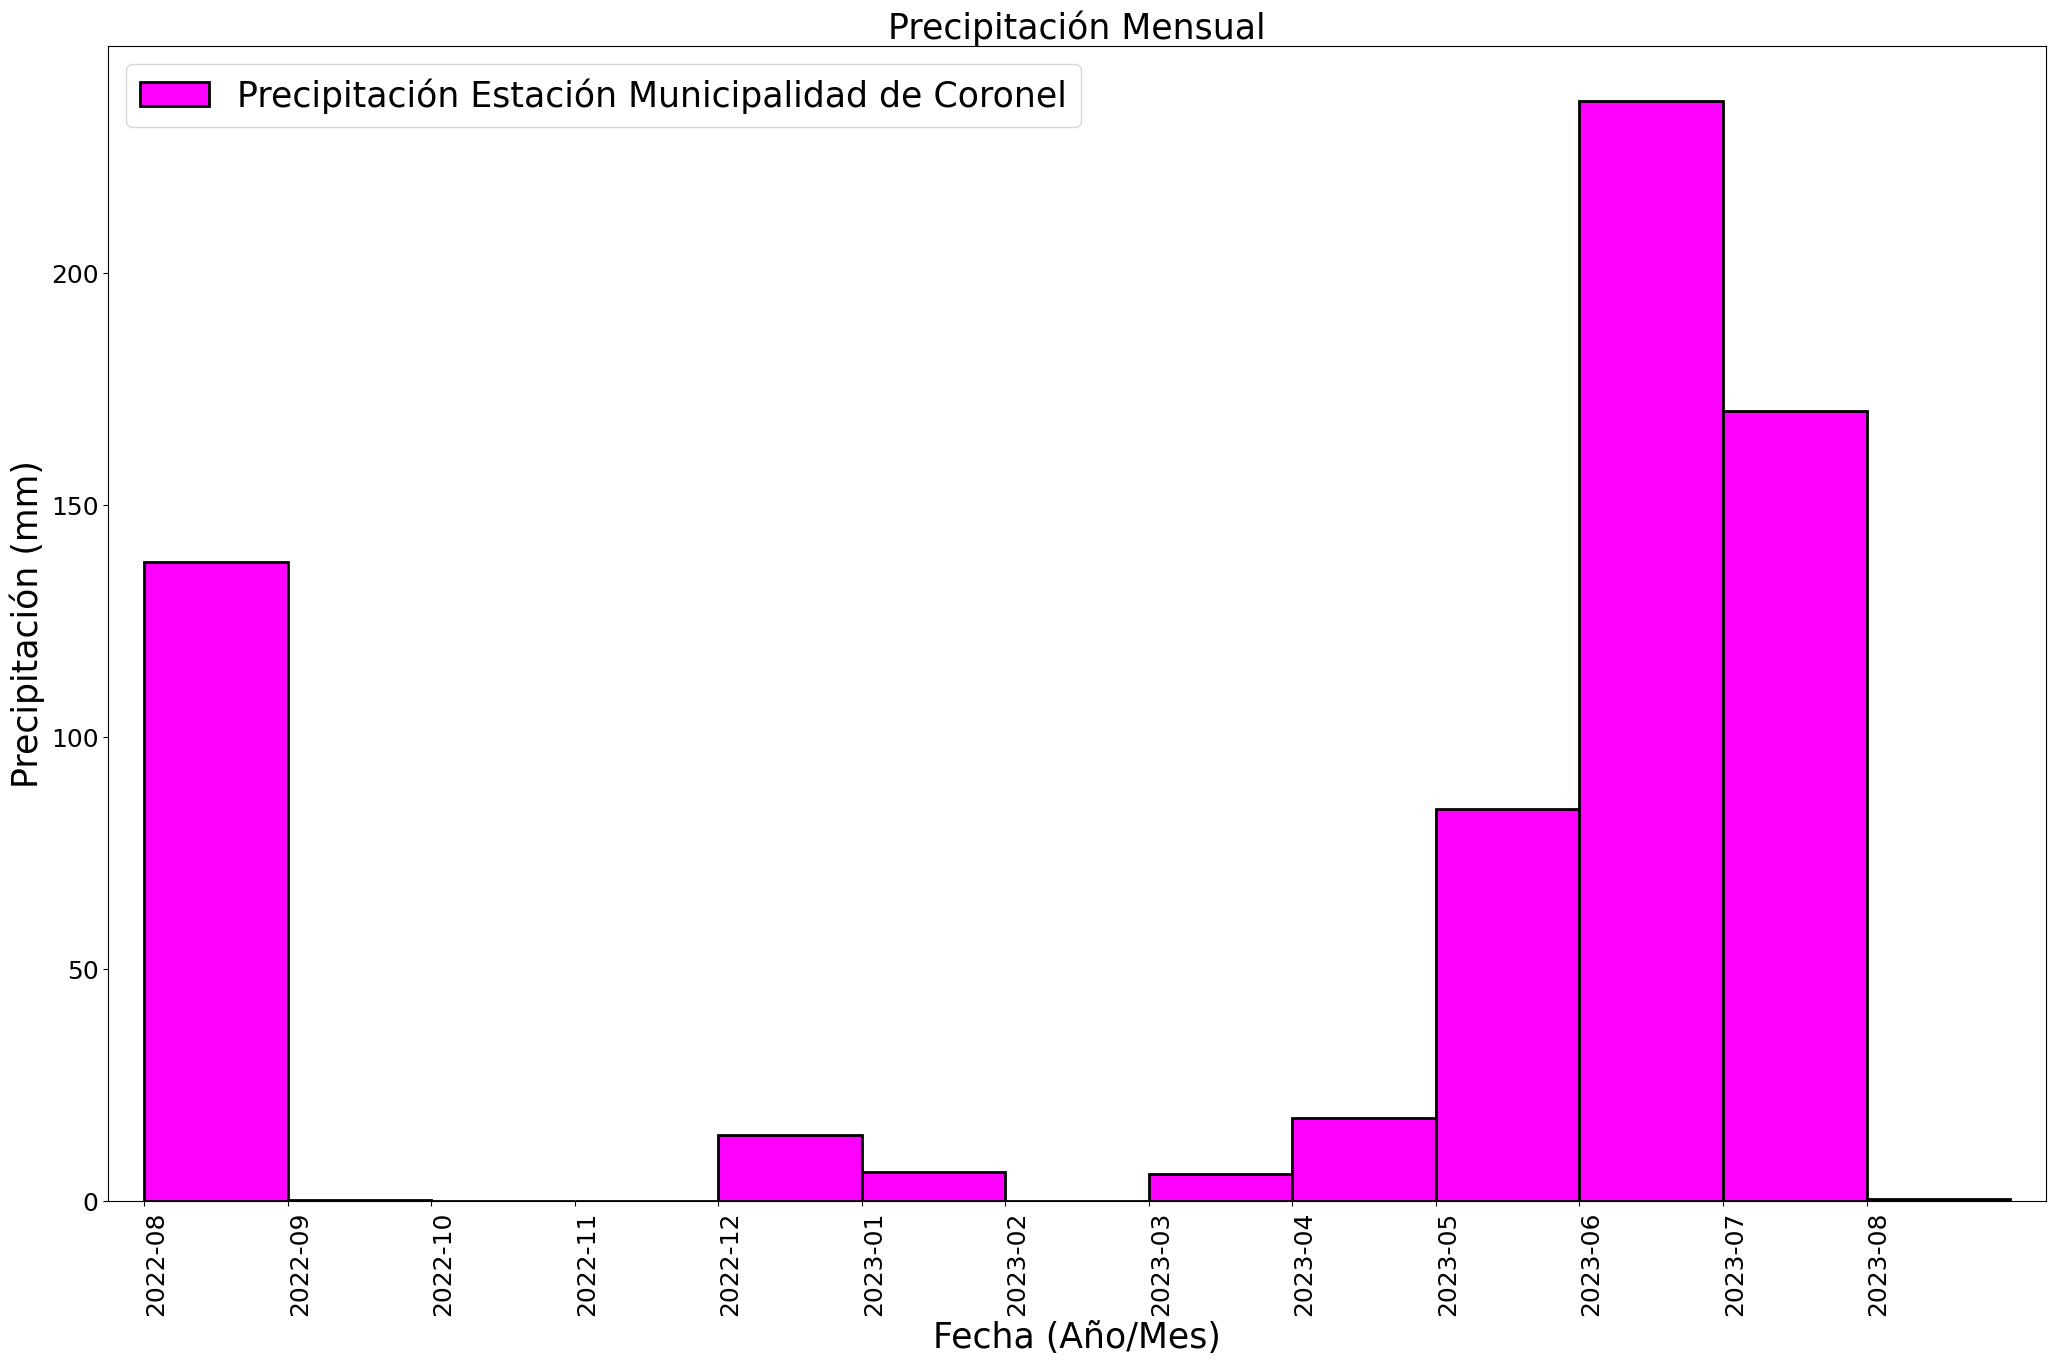

In [92]:
import matplotlib.pyplot as plt

# crea la figura y el eje
fig, ax = plt.subplots()

# Define el tamaño de la figura
fig.set_size_inches(25, 15)


# grafica los datos en barras

precip_mensual.plot.bar(ax=ax, color='magenta', width=1, edgecolor='k',linewidth=2, align='edge',alpha = 1)
ax.set_xticklabels(precip_mensual.index, rotation=90, ha='left')

# personaliza los ejes y la leyenda
ax.legend(['Precipitación Estación Municipalidad de Coronel'], fontsize=25)
ax.set_xlabel('Fecha (Año/Mes)', fontsize=25)
ax.set_ylabel('Precipitación (mm)', fontsize=25)
ax.set_title('Precipitación Mensual', fontsize=25)
ax.tick_params(axis='both', labelsize=18)


# muestra la gráfica
#plt.savefig('Precipitación Estero El Manzano.png',dpi=900)

La fecha con mayor preciptiación fue el 06-23-2023 con 73.6 mm de agua precipitada.


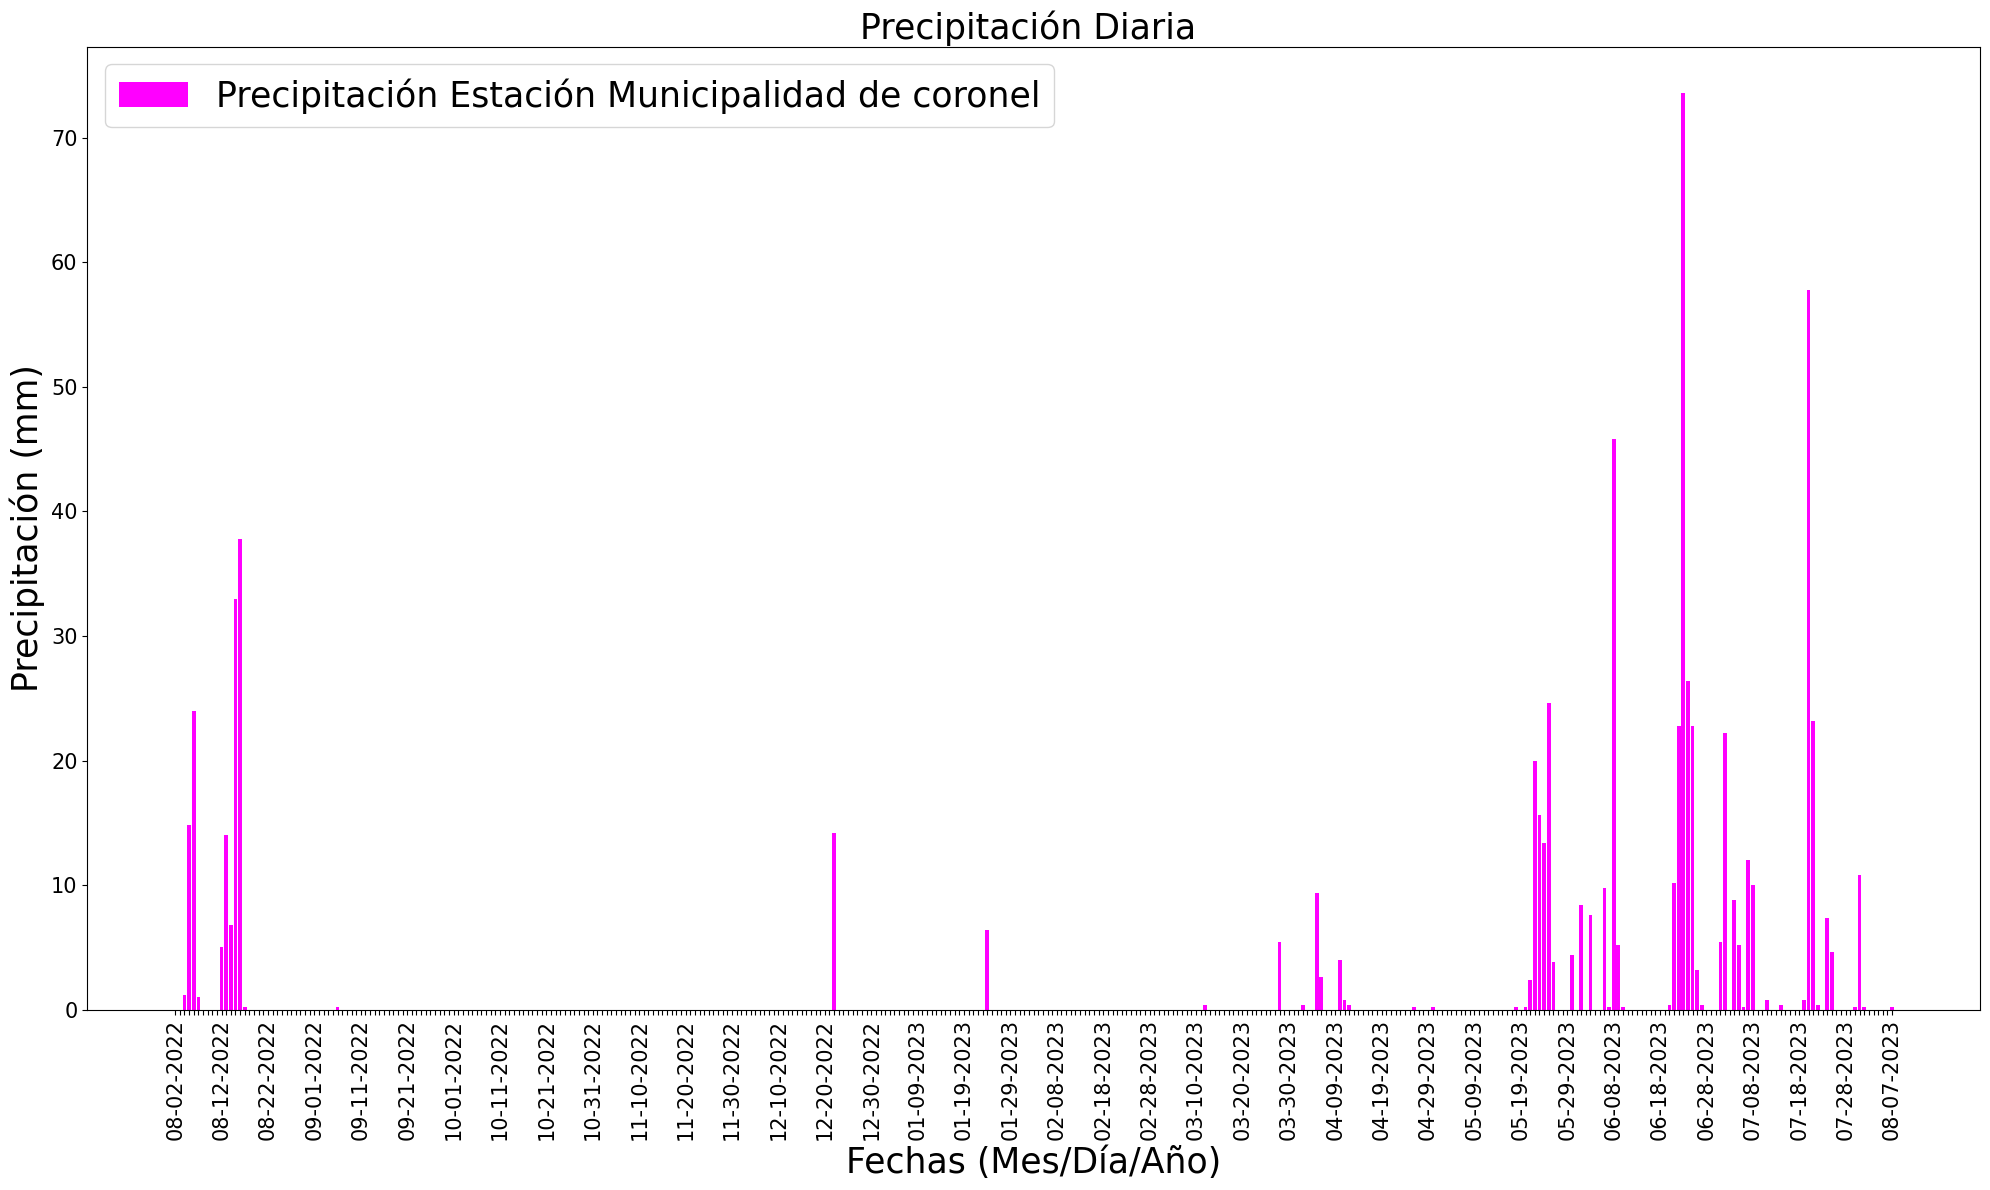

In [93]:

# Crea la figura con el tamaño deseado
fig = plt.figure(figsize=(20, 12))

# Crea el gráfico de barras
plt.bar(range(len(precipi)), precipi, color='magenta')

# Modifica las etiquetas del eje x para mostrar solo cada 10 días
fech_10d = [fech[i] if i % 10 == 0 else "" for i in range(len(fech))]
plt.xticks(range(len(fech)), fech_10d, rotation=90, ha="center")

# Agrega etiquetas a los ejes y título al gráfico
plt.legend(['Precipitación Estación Municipalidad de coronel'], fontsize=25)

plt.xlabel('Fechas (Mes/Día/Año)', fontsize = 25)


plt.ylabel('Precipitación (mm)', fontsize = 25)
plt.title('Precipitación Diaria ', fontsize = 25)
plt.tick_params(axis='both', labelsize=15)
# Muestra el gráfico
plt.tight_layout()

#plt.savefig('Precipitación Diaria en Estación Estero El Manzano.png',dpi=900)

maxindice = np.argmax(precip_dia[cambios_de_dia])
max_precip_fecha = dt_fechas[cambios_de_dia[maxindice]].date().strftime('%m-%d-%Y')
print('La fecha con mayor preciptiación fue el', max_precip_fecha, 'con',np.round(precip_dia.max(),4),'mm de agua precipitada.')
# LA FECHA: MES/DIA/AÑO